In [1]:
import pandas as pd
import pickle
import os
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from wordcloud import WordCloud
import re
from nltk.stem import WordNetLemmatizer
import heapq
from bs4 import BeautifulSoup
import lxml
import requests
import random
import collections
plt.style.use('ggplot')
%matplotlib inline

wd5 = '/Users/tmm/Documents/GitHub/STA160-Project/STA160-Jobs-Market-Project/Cybercoder/data'
os.chdir(wd5)

/Users/tmm/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
master_data_in = open('jobs_data.pickle', 'rb')
master_data = pickle.load(master_data_in)
master_data_in.close()

data_scientist_df_in = open('data_scientist_data.pickle', 'rb')
data_scientist_df = pickle.load(data_scientist_df_in)
data_scientist_df_in.close()

data_engineer_df_in = open('data_engineer_data.pickle', 'rb')
data_engineer_df = pickle.load(data_engineer_df_in)
data_engineer_df_in.close()

data_analyst_df_in = open('data_analyst_data.pickle', 'rb')
data_analyst_df = pickle.load(data_analyst_df_in)
data_analyst_df_in.close()

BI_df_in = open('BI_data.pickle', 'rb')
BI_df= pickle.load(BI_df_in)
BI_df_in.close()

In [3]:
master_data

,Search,Title,Description,Skills,Location,Cities,States,Latitude,Longitude,Min_Salary,Max_Salary,Mean_Salary,URL
0,Data Scientist,Data Scientist,Are you a Data Scientist who has machine learn...,"Statistics, Machine Learning, Applied Mathematics","Los Angeles, CA",Los Angeles,CA,34.052234,-118.243685,100000,200000,150000,https://www.cybercoders.com/data-scientist-job...
1,Data Scientist,Data Scientist,If you are a Data Scientist with 4+ years data...,"Data Science, Machine Learning, R, Python, SQL...","San Francisco, CA",San Francisco,CA,37.774929,-122.419415,110000,175000,142500,https://www.cybercoders.com/data-scientist-job...
2,Data Scientist,Data Scientist,"If you are a Data Scientist with experience, p...","Statistics, Mathematics, Computer Science, Mac...","Woodland Hills, CA",Woodland Hills,CA,34.165357,-118.608975,Unknown,Unknown,Unknown,https://www.cybercoders.com/data-scientist-job...
3,Data Scientist,Data Scientist,If you are a Data Scientist who enjoys buildin...,"Python, Java, SQL (BigQuery/Oracle and Hive), ...","Los Angeles, CA",Los Angeles,CA,34.052234,-118.243685,120000,160000,140000,https://www.cybercoders.com/data-scientist-job...
4,Data Scientist,Data Scientist,"If you are a Data Scientist with experience, p...","R Language, Python, Datasets, SQL Queries","Austin, TX",Austin,TX,30.267153,-97.743061,Unknown,Unknown,Unknown,https://www.cybercoders.com/data-scientist-job...
5,Data Scientist,Data Scientist,If you are a Data Scientist who has Python and...,"Full Stack, Cassandra, ElasticSearch, Solr, Da...","Cambridge, MA",Cambridge,MA,42.373616,-71.109733,110000,150000,130000,https://www.cybercoders.com/data-scientist-job...
6,Data Scientist,Data Scientist,"If you are a Data Scientist with experience, p...","Machine Learning, Tensorflow, Statistical/Mach...","Bethesda, MD",Bethesda,MD,38.984652,-77.094709,100000,120000,110000,https://www.cybercoders.com/data-scientist-job...
7,Data Scientist,Data Scientist,If you are a Data Scientist who enjoys develop...,"Python, Java, SQL (BigQuery/Oracle and Hive), ...","Los Angeles, CA",Los Angeles,CA,34.052234,-118.243685,120000,160000,140000,https://www.cybercoders.com/data-scientist-job...
8,Data Scientist,Data Scientist,Data Scientist - SouthbayWe are creating a b2b...,"Data Science, Machine Learning, Python, scalab...","Campbell, CA",Campbell,CA,37.287165,-121.949957,Unknown,Unknown,Unknown,https://www.cybercoders.com/data-scientist-job...
9,Data Scientist,Data Scientist,"If you are a Data Scientist with experience, p...","Machine Learning, Hadoop, Data Mining, R, Python","San Francisco, CA",San Francisco,CA,37.774929,-122.419415,120000,175000,147500,https://www.cybercoders.com/data-scientist-job...


# 1.) Data Exploration 

## Population Search Term Frequencies
### How many listings are represented for each job type (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence) within the population?

In [4]:
search_counts = master_data['Search'].value_counts()
search_counts

Data Engineer            346
Data Scientist            67
Data Analyst              49
Business Intelligence     48
Name: Search, dtype: int64

On the cybercoders website, given these four search terms the Data Engineer term is by far the most frequent listing. This may skew our data and will need to be accounted for in this analysis. 

### What is the percentage allocation for each job type (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence) in our population?

In [5]:
search_freqDF = pd.DataFrame({'Frequency' : search_counts.values, 'Search' : search_counts.index, })
search_freqDF = search_freqDF[['Search','Frequency']]

percent1 = []
for i in range(len(search_freqDF)):
    holder1 = round(search_freqDF['Frequency'][i] / search_counts.values.sum(), 4)
    percent1.append(holder1)

search_freqDF['Percent of Total'] = percent1

search_freqDF

,Search,Frequency,Percent of Total
0,Data Engineer,346,0.6784
1,Data Scientist,67,0.1314
2,Data Analyst,49,0.0961
3,Business Intelligence,48,0.0941


As noted previously, a large proportion of the listings scraped given the four search terms (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence) are allocated to the Data Engineer position at 67.24%

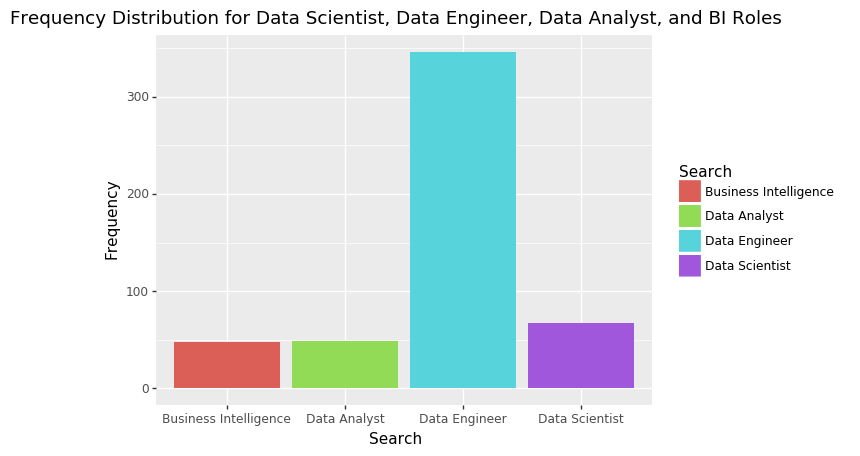

<ggplot: (-9223372029317838399)>

In [6]:
(ggplot(master_data, aes(x = 'Search',fill = 'Search')) +
 geom_bar(stat = "count", position='stack') +
 labs(title = "Frequency Distribution for Data Scientist, Data Engineer, Data Analyst, and BI Roles", x = "Search", y = "Frequency")
)

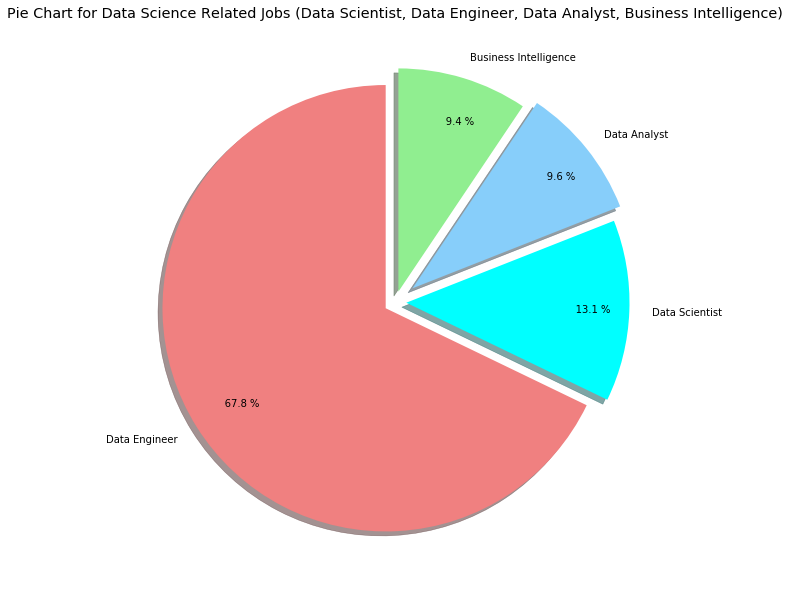

In [7]:
plt.rcParams['figure.figsize'] = (10,20)
labels = search_counts.index[0], search_counts.index[1], search_counts.index[2], search_counts.index[3]
fracs = [search_counts[i] for i in range(len(search_counts))]
explode = [0.05, 0.05, 0.1, 0.05]
plt.axes(aspect=1)  
colors = ['lightcoral', 'cyan','lightskyblue','lightgreen']
plt.title('Pie Chart for Data Science Related Jobs (Data Scientist, Data Engineer, Data Analyst, Business Intelligence)')
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%9.1f %%', colors=colors,
        shadow=True, labeldistance=1.1, startangle = 90, pctdistance = 0.8)
plt.show()

## Population State Frequencies
### What are the state frequencies representing our population?

In [8]:
state_counts = master_data['States'].value_counts()
state_counts

CA    256
NY     49
MA     28
VA     19
TX     15
WA     15
NC     12
PA     10
MD     10
GA      9
NJ      8
IL      8
NV      6
MI      6
MO      6
CO      6
IN      5
SC      4
FL      4
AL      4
DC      4
MN      3
ON      2
RI      2
OH      2
CT      2
TN      2
NE      2
NH      2
IA      2
KY      1
UT      1
OR      1
KS      1
AB      1
AZ      1
WI      1
Name: States, dtype: int64

Here we discover that 255 of our listings are those located in the state of California. Intuition says that this may be due to the large number of technology jobs in the Silicon Valley/Bay Area. Given that we are interested in data science related jobs this makes sense. 

In [9]:
state_freqDF = pd.DataFrame({'Frequency' : state_counts.values, 'States' : state_counts.index, })
state_freqDF = state_freqDF[['States','Frequency']]

percent2 = []
for i in range(len(state_freqDF)):
    holder2 = round(state_freqDF['Frequency'][i] / state_counts.values.sum(), 4)
    percent2.append(holder2)

state_freqDF['Percent of Total'] = percent2

state_freqDF

,States,Frequency,Percent of Total
0,CA,256,0.5020
1,NY,49,0.0961
2,MA,28,0.0549
3,VA,19,0.0373
4,TX,15,0.0294
5,WA,15,0.0294
6,NC,12,0.0235
7,PA,10,0.0196
8,MD,10,0.0196
9,GA,9,0.0176


As noted previously, a large proportion of the listings scraped given the four search terms (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence) are allocated to California at 49.13%. This covers almost half of the total states represented in our population. 

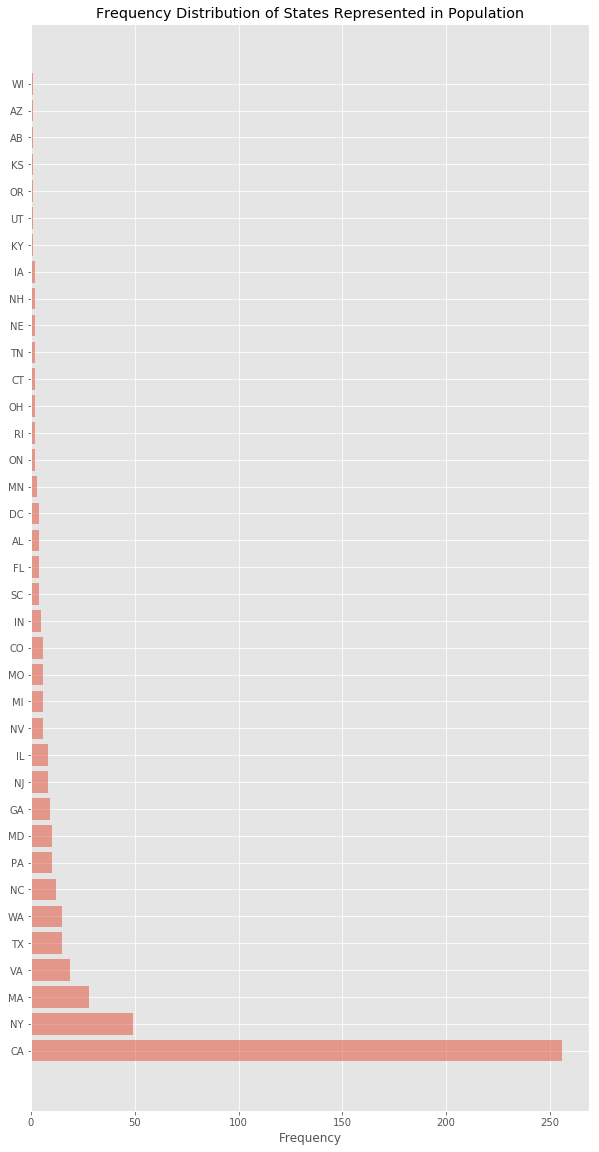

In [10]:
objects = state_counts.index
y_pos = np.arange(len(objects))
performance = state_counts.values
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Frequency')
plt.title('Frequency Distribution of States Represented in Population')
 
plt.show()

## Search Term Frequency Per State 
### How many listings are represented for each job type (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence) within each state?

In [11]:
state_grouper = master_data.groupby('States')
jobs_per_state = state_grouper['Search'].value_counts()
jobs_per_state = jobs_per_state.reset_index(name = 'Frequency')
jobs_per_state

,States,Search,Frequency
0,AB,Data Scientist,1
1,AL,Data Engineer,3
2,AL,Business Intelligence,1
3,AZ,Data Analyst,1
4,CA,Data Engineer,177
5,CA,Data Scientist,35
6,CA,Business Intelligence,23
7,CA,Data Analyst,21
8,CO,Data Engineer,6
9,CT,Business Intelligence,1


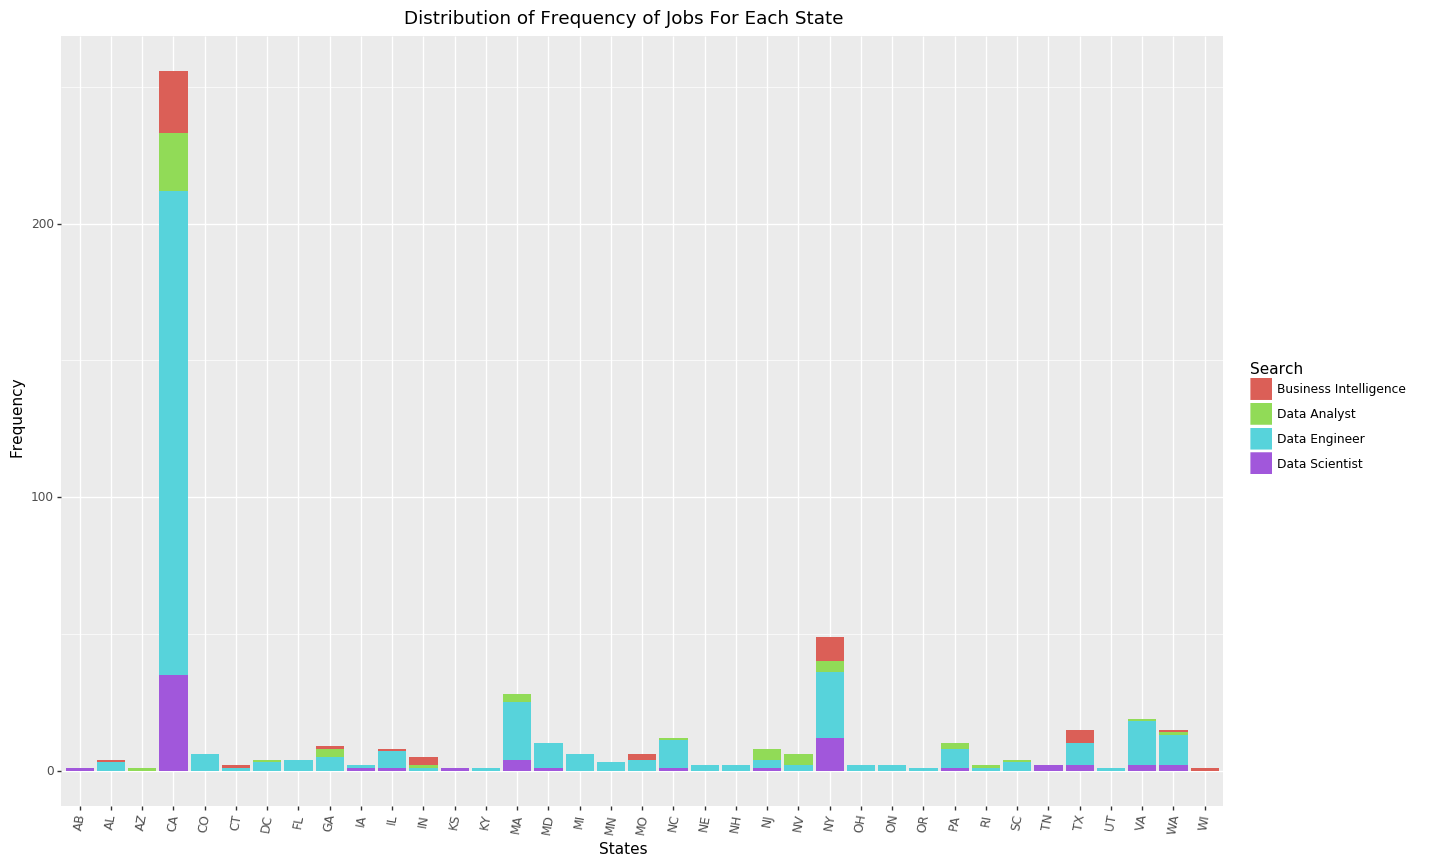

<ggplot: (7537187946)>

In [12]:
(ggplot(jobs_per_state, aes(x = "States", y = 'Frequency', fill="Search")) +
 geom_bar(stat = "identity",position='stack')+
 theme(figure_size=(15, 10),axis_text_x= element_text(rotation=80))+
 labs(title = "Distribution of Frequency of Jobs For Each State", x = "States", y = "Frequency")
)

As you can see from the above plot CA and NY stand out in that they represent each of the four job types. Next, we'll standardize the counts for each state given the search term to remove the skew due to the largest proportion of listings located in the state of California. 

### What are the proportions for each job type (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence) in each state?
### Do some states have a greater proportion of their available listings allocated to a particular job type?

In [13]:
search_state_set = np.unique(jobs_per_state['States'])
search_state_dict = dict(tuple(jobs_per_state.groupby('States')))

search_freqDF = []
for state in search_state_set:
    search_state_freqDF = pd.DataFrame({'Frequency' : list(search_state_dict[state]['Frequency']), 
                                        'Search' : list(search_state_dict[state]['Search']),
                                        'States' : list(search_state_dict[state]['States'])})
    search_state_freqDF = search_state_freqDF[['States', 'Search', 'Frequency']]

    percent4 = []

    for i in range(len(search_state_freqDF)):
        holder4 = round(search_state_freqDF['Frequency'][i] / sum(list(search_state_freqDF['Frequency'])),4)
        percent4.append(holder4)
    search_state_freqDF['Percent of Total'] = percent4
    search_freqDF.append(search_state_freqDF)

search_freqDF = pd.concat(search_freqDF, ignore_index = True)
search_freqDF

,States,Search,Frequency,Percent of Total
0,AB,Data Scientist,1,1.0000
1,AL,Data Engineer,3,0.7500
2,AL,Business Intelligence,1,0.2500
3,AZ,Data Analyst,1,1.0000
4,CA,Data Engineer,177,0.6914
5,CA,Data Scientist,35,0.1367
6,CA,Business Intelligence,23,0.0898
7,CA,Data Analyst,21,0.0820
8,CO,Data Engineer,6,1.0000
9,CT,Business Intelligence,1,0.5000


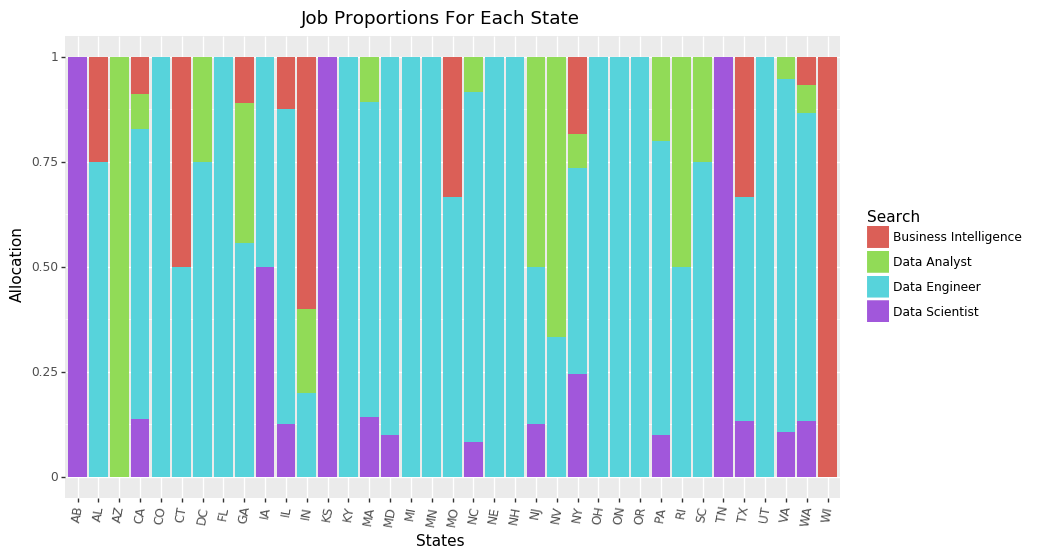

<ggplot: (7537582740)>

In [14]:
(ggplot(search_freqDF, aes(x = "States", y = 'Percent of Total', fill="Search")) +
 geom_bar(stat = "identity",position='stack')+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Job Proportions For Each State", x = "States", y = "Allocation")
)

After converting the frequency of listings for each job type given a state we are able to have a better look at the variety of data science related options for each state. Some noteworthy states are as follows: 

Four job types represented:
CA, NY

Three job types represented:
GA, IN, MA, MO, NC, NJ, PA, TX, VA, and WA

Later on we'll analyze skills and if you are interested in more than one of the given job types the above states may be a good place to look for a variety of data science related positions. 

## City Frequencies Per State
### What are the frequencies for each city within the represented states?
### Do any cities in particular stand out which may indicative of a hotspot for data science jobs?

In [15]:
city_grouper = master_data.groupby('States')
jobs_per_city = city_grouper['Cities'].value_counts()
jobs_per_city = jobs_per_city.reset_index(name = 'Frequency')
jobs_per_city = jobs_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
jobs_per_city 

,States,Cities,Frequency
0,CA,San Francisco,46
1,NY,New York City,35
2,CA,San Jose,24
3,CA,San Mateo,22
4,CA,Irvine,21
5,CA,Los Angeles,18
6,WA,Seattle,11
7,CA,Palo Alto,11
8,CA,Redwood City,8
9,GA,Atlanta,8


For now we'll ignore the fact that California is vastly represented in our population and can conclude that the following cities may be great places to search for Data Scientist, Data Engineer, Data Analyst, and Business Intelligence jobs.

1.) San Francisco, CA
2.) New York City, NY
3.) San Mateo, CA
4.) San Jose, CA
5.) Irvine, CA
6.) Los Angeles, CA
7.) Palo Alto, CA
8.) Seattle, WA
9.) Redwood City, CA
10.) Cambridge, MA

The idea behind why we feel that it is reasonable to ignore the much larger proportion of listings located in California is based on the fact that many of the technology companies which are known to have more data science positions are located in the Bay Area. We can see from above that five out of the top 10 represented cities are located in this area. 

In [16]:
jobs_per_city[:15]

,States,Cities,Frequency
0,CA,San Francisco,46
1,NY,New York City,35
2,CA,San Jose,24
3,CA,San Mateo,22
4,CA,Irvine,21
5,CA,Los Angeles,18
6,WA,Seattle,11
7,CA,Palo Alto,11
8,CA,Redwood City,8
9,GA,Atlanta,8


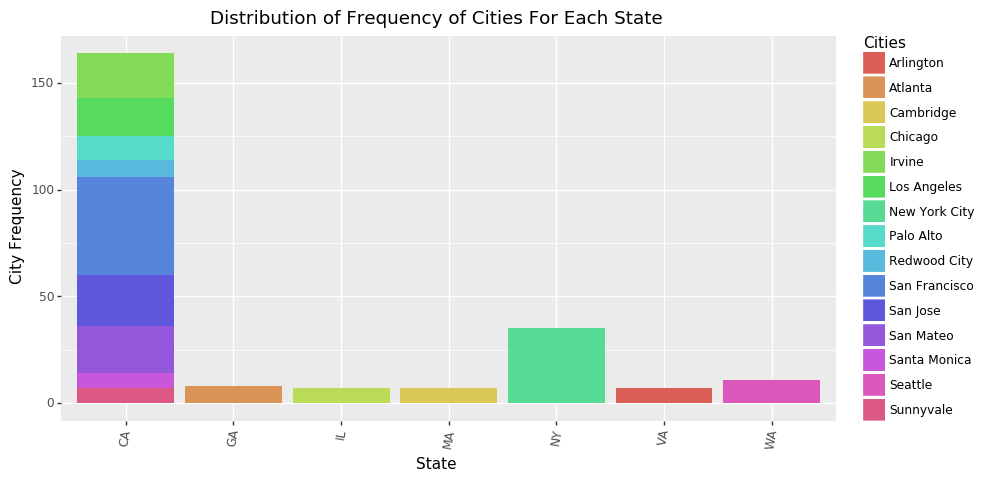

<ggplot: (7537052329)>

In [17]:
(ggplot(jobs_per_city[:15], aes(x = "States", y = 'Frequency', fill="Cities")) +
 geom_bar(stat = "identity", position='stack', show_legend = True)+
 theme(figure_size=(10, 5),axis_text_x= element_text(rotation=80))+
 labs(title = "Distribution of Frequency of Cities For Each State", x = "State", y = "City Frequency")
)

In order to support our previous statement, California stands out because compared to the other states there are many different options for city locations within that state. Unlike the other top city states where there are no more than two city options. 

### How does the number of cities proportionate to the total number of listings for a particular state effect the distribution of listings in our population?

In [18]:
search_cities_set = np.unique(jobs_per_city['States'])
search_cities_dict = dict(tuple(jobs_per_city.groupby('States')))

search_cit_freqDF = []
for city in search_cities_set:
    search_cities_freqDF = pd.DataFrame({'Frequency' : list(search_cities_dict[city]['Frequency']), 
                                         'Cities' : list(search_cities_dict[city]['Cities']),
                                         'States' : list(search_cities_dict[city]['States'])})
    
    search_cities_freqDF = search_cities_freqDF[['States','Cities','Frequency']]

    percent5 = []

    for i in range(len(search_cities_freqDF)):
        holder5 = round(search_cities_freqDF['Frequency'][i] / sum(list(search_cities_freqDF['Frequency'])),4)
        percent5.append(holder5)
    search_cities_freqDF['Percent of Total'] = percent5
    search_cit_freqDF.append(search_cities_freqDF)

search_cit_freqDF = pd.concat(search_cit_freqDF, ignore_index = True)
search_cit_freqDF = search_cit_freqDF.sort_values(by = 'States',ascending = True).reset_index(drop = True)
search_cit_freqDF

,States,Cities,Frequency,Percent of Total
0,AB,Calgary,1,1.0000
1,AL,Albertville,2,0.5000
2,AL,Huntsville,1,0.2500
3,AL,Daphne,1,0.2500
4,AZ,Scottsdale,1,1.0000
5,CA,Newport Beach,1,0.0039
6,CA,North Hollywood,1,0.0039
7,CA,Palm Springs,1,0.0039
8,CA,Pasadena,1,0.0039
9,CA,Redondo Beach,1,0.0039


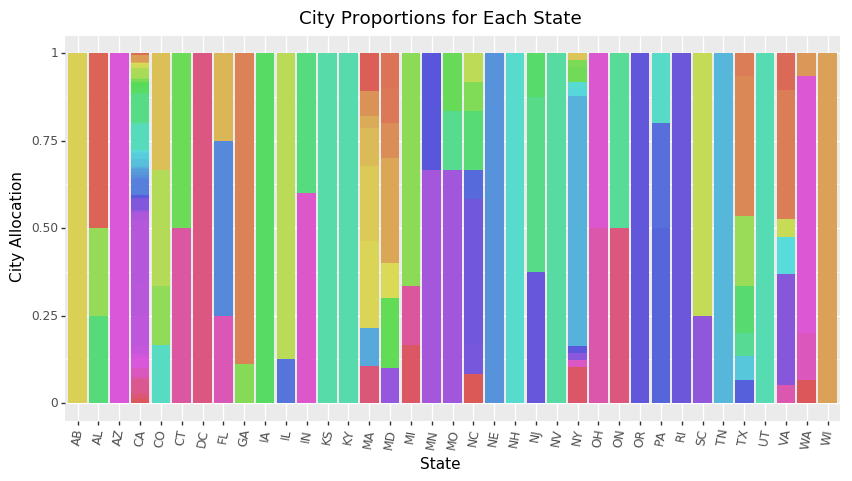

<ggplot: (-9223372029317580968)>

In [19]:
(ggplot(search_cit_freqDF, aes(x = "States", y = 'Percent of Total', fill="Cities")) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 5),axis_text_x= element_text(rotation=80))+
 labs(title = "City Proportions for Each State", x = "State", y = "City Allocation")
)

You will notice above that states with a greater number of cities represented given our listings is indicative of a wider range of options for relocation when thinking about your job search. 

California, Colorado, Massachussetts, Maryland, and North Carolina have a large number of cities represented by our listings meaning a job seeker has options for the same job title but in different cities with a preferred state. 

## Data Scientist Listing Frequencies Per City
### What are the top 10 cities in the USA for a person seeking a Data Scientist position?

In [20]:
ds_city_grouper = data_scientist_df.groupby('Location')
ds_per_city = ds_city_grouper['Search'].value_counts()
ds_per_city = ds_per_city.reset_index(name = 'Frequency')
ds_per_city = ds_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
ds_per_city

,Location,Search,Frequency
0,"New York City, NY",Data Scientist,11
1,"San Francisco, CA",Data Scientist,11
2,"Los Angeles, CA",Data Scientist,4
3,"Sunnyvale, CA",Data Scientist,3
4,"San Mateo, CA",Data Scientist,3
5,"San Jose, CA",Data Scientist,2
6,"West Hollywood, CA",Data Scientist,2
7,"Berkeley, CA",Data Scientist,2
8,"Nashville, TN",Data Scientist,2
9,"Cambridge, MA",Data Scientist,2


In [21]:
TOP_ds = ds_per_city[:10]

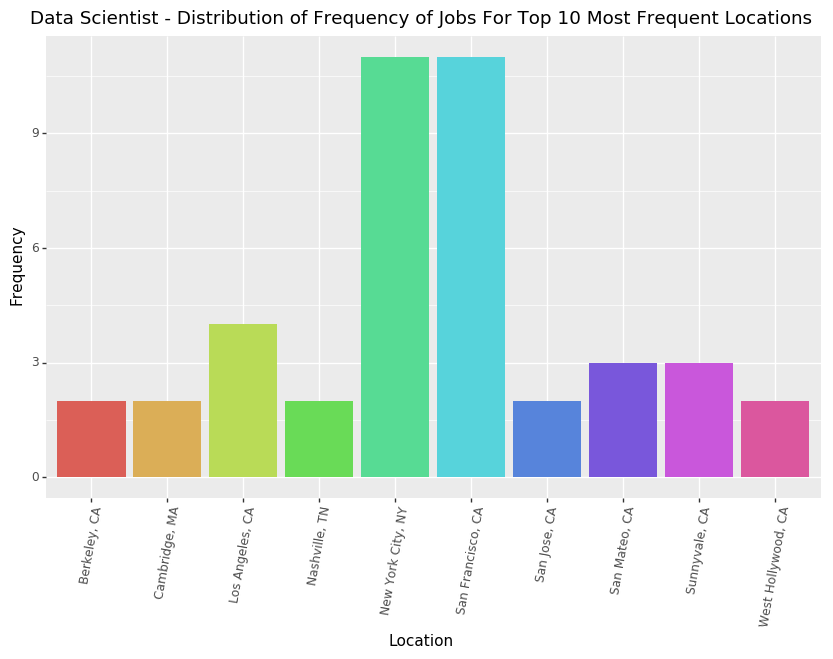

<ggplot: (7537612878)>

In [22]:
(ggplot(TOP_ds, aes(x = "Location", y = 'Frequency', fill='Location')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Data Scientist - Distribution of Frequency of Jobs For Top 10 Most Frequent Locations", x = "Location", y = "Frequency")
)

If you are seeking a data scientist position, your best option is to look in New York City - NY and San Francisco - CA. 

## Data Engineer Listing Frequencies Per City
### What are the top 10 cities in the USA for a person seeking a Data Engineer position?

In [23]:
de_city_grouper = data_engineer_df.groupby('Location')
de_per_city = de_city_grouper['Search'].value_counts()
de_per_city = de_per_city.reset_index(name = 'Frequency')
de_per_city = de_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
de_per_city

,Location,Search,Frequency
0,"San Francisco, CA",Data Engineer,32
1,"San Jose, CA",Data Engineer,20
2,"New York City, NY",Data Engineer,18
3,"San Mateo, CA",Data Engineer,16
4,"Irvine, CA",Data Engineer,14
5,"Los Angeles, CA",Data Engineer,13
6,"Seattle, WA",Data Engineer,9
7,"Palo Alto, CA",Data Engineer,8
8,"Arlington, VA",Data Engineer,7
9,"Reston, VA",Data Engineer,6


In [24]:
TOP_de = de_per_city[:10]

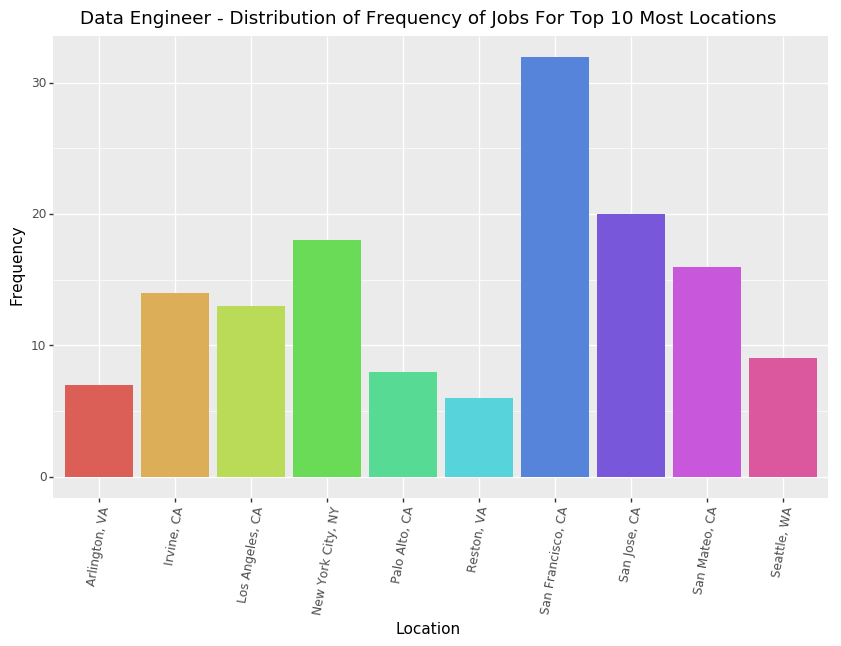

<ggplot: (-9223372029317135707)>

In [25]:
(ggplot(TOP_de, aes(x = "Location", y = 'Frequency', fill='Location')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Data Engineer - Distribution of Frequency of Jobs For Top 10 Most Locations", x = "Location", y = "Frequency")
)

If you are seeking a data engineering position, your best option is to look in San Francisco - CA, San Jose - CA, San Mateo - CA, and New York City - NY. 

## Data Analyst Listing Frequencies Per City
### What are the top 10 cities in the USA for a person seeking a Data Analyst position?

In [26]:
da_city_grouper = data_analyst_df.groupby('Location')
da_per_city = da_city_grouper['Search'].value_counts()
da_per_city = da_per_city.reset_index(name = 'Frequency')
da_per_city = da_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
da_per_city

,Location,Search,Frequency
0,"New York City, NY",Data Analyst,4
1,"Las Vegas, NV",Data Analyst,4
2,"Atlanta, GA",Data Analyst,3
3,"Ventura, CA",Data Analyst,3
4,"Princeton, NJ",Data Analyst,3
5,"Laguna Niguel, CA",Data Analyst,2
6,"Woodland Hills, CA",Data Analyst,2
7,"San Jose, CA",Data Analyst,2
8,"Orange, CA",Data Analyst,2
9,"Cambridge, MA",Data Analyst,2


In [27]:
TOP_da = da_per_city[:10]

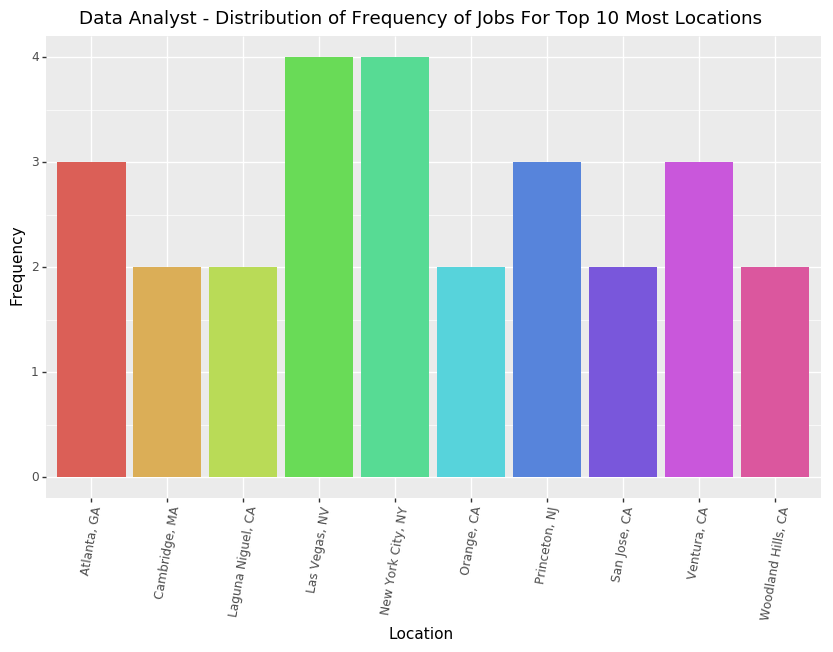

<ggplot: (-9223372029317571794)>

In [28]:
(ggplot(TOP_da, aes(x = "Location", y = 'Frequency', fill='Location')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Data Analyst - Distribution of Frequency of Jobs For Top 10 Most Locations", x = "Location", y = "Frequency")
)

If you are seeking a data analyst position, your best option is to look in Las Vegas - NV, New York City - NY, Atlanta - GA, Princeton - NJ, and Ventura - CA. 

## Business Intelligence Listing Frequency Per City
### What are the top 10 cities in the USA for a person seeking a Business Intelligence position?

In [29]:
bi_city_grouper = BI_df.groupby('Location')
bi_per_city = bi_city_grouper['Search'].value_counts()
bi_per_city = bi_per_city.reset_index(name = 'Frequency')
bi_per_city = bi_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
bi_per_city

,Location,Search,Frequency
0,"Irvine, CA",Business Intelligence,7
1,"White Plains, NY",Business Intelligence,5
2,"South Bend, IN",Business Intelligence,3
3,"San Mateo, CA",Business Intelligence,3
4,"Palo Alto, CA",Business Intelligence,3
5,"San Diego, CA",Business Intelligence,2
6,"Milpitas, CA",Business Intelligence,2
7,"New York City, NY",Business Intelligence,2
8,"Austin, TX",Business Intelligence,2
9,"San Francisco, CA",Business Intelligence,2


In [30]:
TOP_bi = bi_per_city[:10]

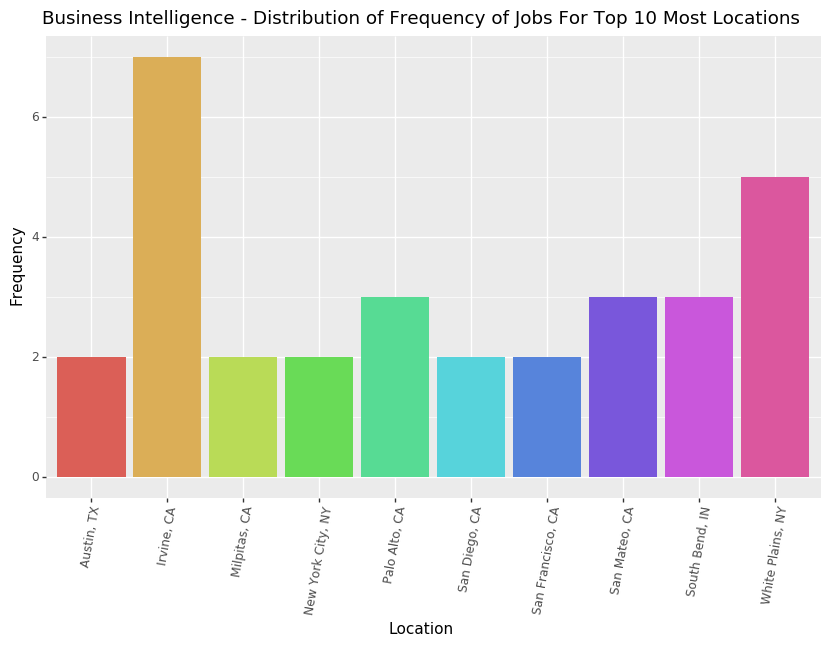

<ggplot: (7538510919)>

In [31]:
(ggplot(TOP_bi, aes(x = "Location", y = 'Frequency', fill='Location')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Business Intelligence - Distribution of Frequency of Jobs For Top 10 Most Locations", x = "Location", y = "Frequency")
)

If you are seeking a business intelligence position, your best option is to look in Irvine - CA and White Plains - NY.

# 2.) Analysis - Preferred Qualifications 

In [32]:
stop_words = stopwords.words("english") + ['data',
                                           'analysis',
                                           'development',
                                           'design',
                                           'modeling',
                                           'systems',
                                           'analytics',
                                           'test',
                                           'management',
                                           'security',
                                           'server',
                                           'system',
                                           'engineering',
                                           'model',
                                           'experience', 
                                           'data', 
                                           'structures',
                                           'science',
                                           'software',
                                           'algorithms',
                                           'testing',
                                           'business']


In [33]:
skills_df = master_data.copy()

In [34]:
for i in range(len(skills_df)):
    skills_df.loc[i, 'Skills'] = skills_df['Skills'][i].replace("Machine Learning",'Machine-Learning')
    skills_df.loc[i, 'Skills'] = skills_df['Skills'][i].replace("Big Data",'Big-Data')
    skills_df.loc[i, 'Skills'] = skills_df['Skills'][i].replace("Tekla Structures",'Tekla-Structures')

In [35]:
skills_set = set(skills_df['Skills'])

In [36]:
skills_set

{'.NET, C#, SQL, Agile Software Development, ASP.NET, NoSQL, AngularJS',
 '.NET, C#, SQL, Team Foundation Server (TFS), Agile Software Development',
 '.NET, C#, Windows, Big-Data, SQL Server',
 '.NET, Visual Studio, C#, SQL, MVC',
 'AI, Marketing, Strategic Partnerships, Business Development, Artificial Intelligence, Machine-Learning',
 'API Development, Large Data Sets, C#, Java, Python, AWS, REACT, Node.js, Agile Methodologies, elastic search',
 'ASIC/SoC, Verification Flows, Verification process, SV/UVM environments, SoC architecture/design, CPU, Data center protocols, Ethernet, Startup Experience',
 "ASP.NET MVC, C#, JavaScript, WCF, RESTful API's",
 'ASP.NET MVC, C#/.NET, SQL Server, Developing Custom Internal Business Applications',
 'ASP.NET, MVC, C#, JQuery, SQL, Entity Framework',
 'AWS, Big-Data, Python, Production Level Coding',
 'Account Executive, Sales, SaaS, Business Intelligence, B2B Sales',
 'Air Quality Assessment, Environmental Engineering, Emissions Reporting, Emiss

In [37]:
def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)

def newtext(text):
    '''Return a new text after the stopwords and lemmatizing'''
    blob = TextBlob(text)
    new_text = " ".join(w for w in blob.words if w.lower() not in stop_words)
    blob = TextBlob(new_text)
    tags = [wordnet_pos(x[1]) for x in blob.pos_tags]
    new_text = " ".join(x.lemmatize(t) for x, t in zip(blob.words, tags))
    blob = TextBlob(new_text)
    return new_text

def ReturnCount(text):
    '''Return a word counts dictionary'''
    new = newtext(text)
    blob = TextBlob(new)
    return blob.word_counts  

def countdata(text):
    '''
    Sort the counts of each distinct word
    input:text(string)
    output:datafrane of the word counts dictionary
    '''
    dic = ReturnCount(text)
    count=pd.DataFrame(list(dic.items()), columns=['word', 'count'])
    return count

def countsort(text):
    '''
    sort the countdata
    input:text(string)
    output:dataframe of 10 most frequent words and their counts
    '''
    df1 = countdata(text)
    newdf = df1.sort_values(by='count', ascending=False).head(20)
    return newdf

def barplot(text,theme):
    '''
    input:text(string),theme like art,sports(string)
    output:barplot of the most frequent words and counts
    '''
    data = countsort(text)
    new = newtext(text)
    plt.rcParams['figure.figsize'] = (10, 10)
    sns.set(font_scale = 1.5)

    sns.set_style("whitegrid")
    fruit_bar = sns.barplot(x = "word", y = "count", data =data)
    for item in fruit_bar.get_xticklabels():
        item.set_rotation(60)
    plt.title(theme)
    fruit_bar.set(ylabel = 'Count', xlabel = 'Word')
    p=plt.show()
    return p

def wordcloud(text,theme):
    '''
    input:text(string),theme like art,sports(string)
    output:wordcloud of the text
    '''
    data=countsort(text)
    new=newtext(text)

    # Generate a word cloud image
    wordcloud = WordCloud().generate(new)

   # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(new)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title('wordcloud of '+theme)
    p=plt.show()
    return p


### Top Skills Overall (Data Scientist, Data Engineer, Data Analyst, Business Intelligence)

In [38]:
skills=' '.join([str(i) for i in skills_df['Skills']])
skills_frequency = countsort(skills)
skills_frequency = skills_frequency.sort_values(by = 'count', ascending = False).reset_index(drop = True)
skills_frequency = skills_frequency.rename(columns = {'word' : 'Overall', 'count' : 'Frequency'})
skills_frequency

,Overall,Frequency
0,python,167
1,java,138
2,sql,136
3,machine-learning,96
4,c,89
5,big-data,80
6,hadoop,63
7,aws,59
8,javascript,47
9,linux,45


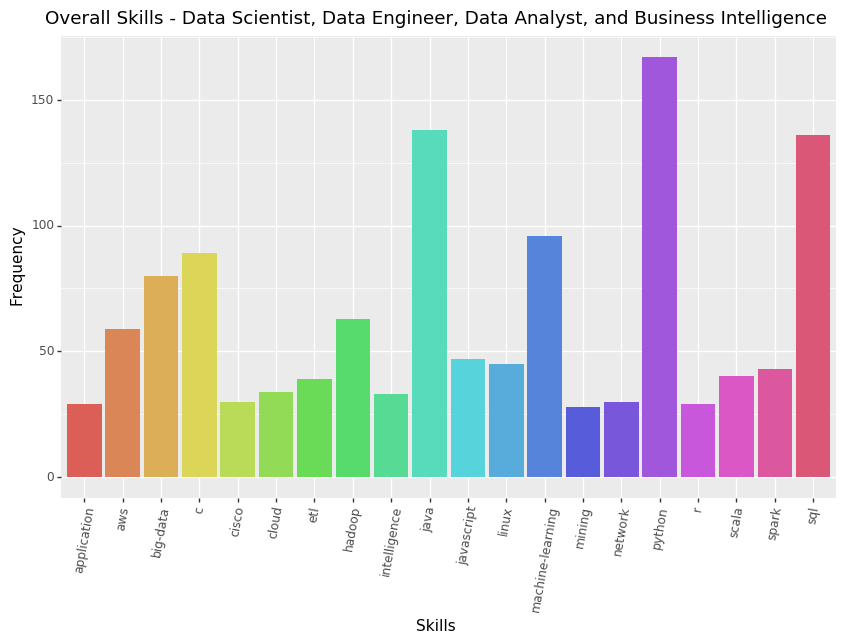

<ggplot: (-9223372029315558810)>

In [39]:
(ggplot(skills_frequency, aes(x = "Overall", y = 'Frequency', fill='Overall')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Overall Skills - Data Scientist, Data Engineer, Data Analyst, and Business Intelligence", x = "Skills", y = "Frequency")
)

In [40]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    """
    Purpose : Change the color of the words in the word cloud to grey scale 
    """
    return "hsl(0, 0%%, %d%%)" % random.randint(70, 100)

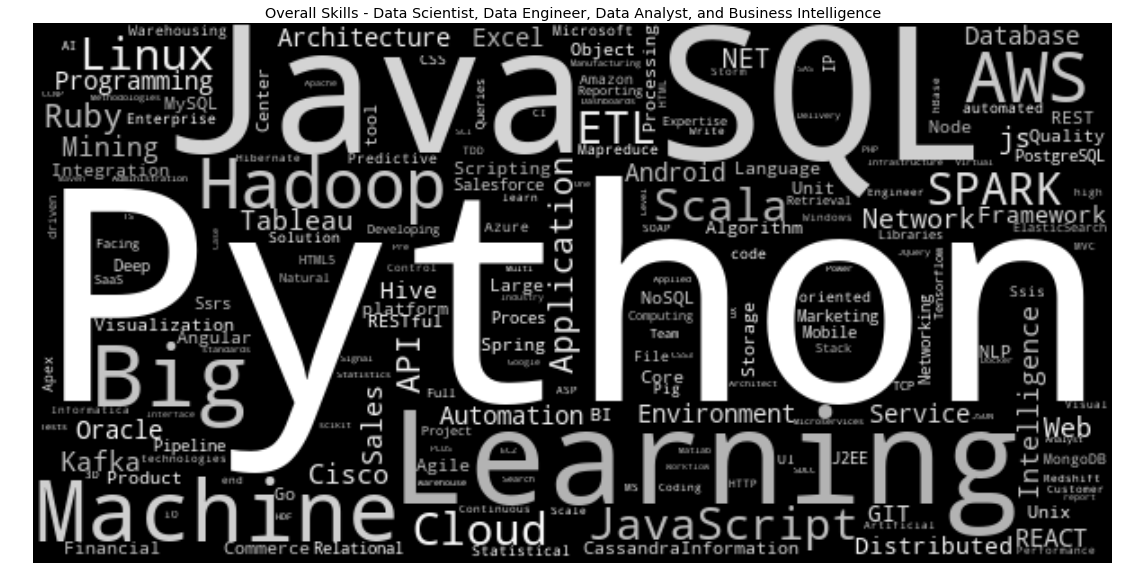

In [41]:
overall_skills = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 600, height = 300)
overall_skills.generate(skills)
plt.figure(figsize = (15,7.5))
plt.imshow(overall_skills.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Overall Skills - Data Scientist, Data Engineer, Data Analyst, and Business Intelligence")
plt.show()

### Top Skills - Data Scientist

In [42]:
ds_skills=' '.join([str(i) for i in data_scientist_df['Skills']])
ds_skills_frequency = countsort(ds_skills)
ds_skills_frequency = ds_skills_frequency.sort_values(by = 'count', ascending = False).reset_index(drop = True)
ds_skills_frequency = ds_skills_frequency.rename(columns = {'word' : 'Data Scientist', 'count' : 'Frequency'})
ds_skills_frequency

,Data Scientist,Frequency
0,learning,62
1,machine,54
2,python,46
3,r,20
4,sql,18
5,mining,13
6,hadoop,11
7,big,10
8,nlp,9
9,java,9


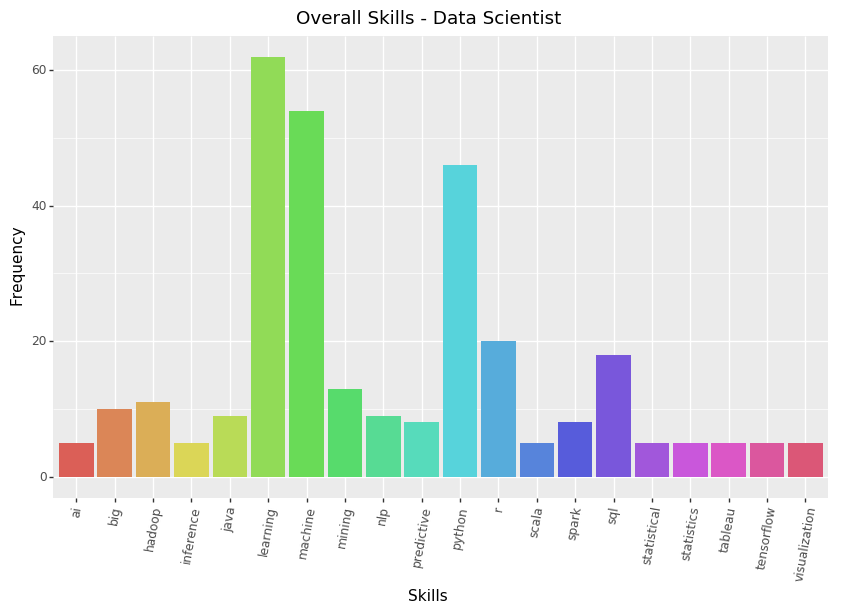

<ggplot: (7540673400)>

In [43]:
(ggplot(ds_skills_frequency, aes(x = "Data Scientist", y = 'Frequency', fill='Data Scientist')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Overall Skills - Data Scientist", x = "Skills", y = "Frequency")
)

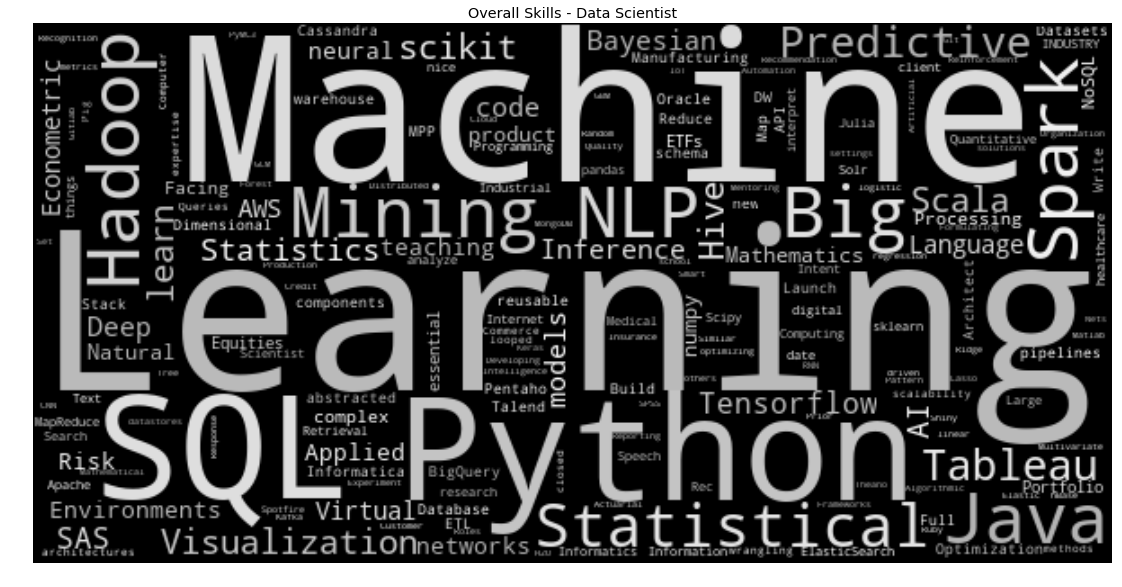

In [44]:
ds_overall_skills = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 600, height = 300)
ds_overall_skills.generate(ds_skills)
plt.figure(figsize = (15,7.5))
plt.imshow(ds_overall_skills.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Overall Skills - Data Scientist")
plt.show()

### Top Skills  - Data Engineer

In [45]:
de_skills=' '.join([str(i) for i in data_engineer_df['Skills']])
de_skills_frequency = countsort(de_skills)
de_skills_frequency = de_skills_frequency.sort_values(by = 'count', ascending = False).reset_index(drop = True)
de_skills_frequency = de_skills_frequency.rename(columns = {'word' : 'Data Engineer', 'count' : 'Frequency'})
de_skills_frequency

,Data Engineer,Frequency
0,java,119
1,python,113
2,c,77
3,big,73
4,sql,69
5,aws,51
6,hadoop,49
7,learning,46
8,linux,45
9,javascript,44


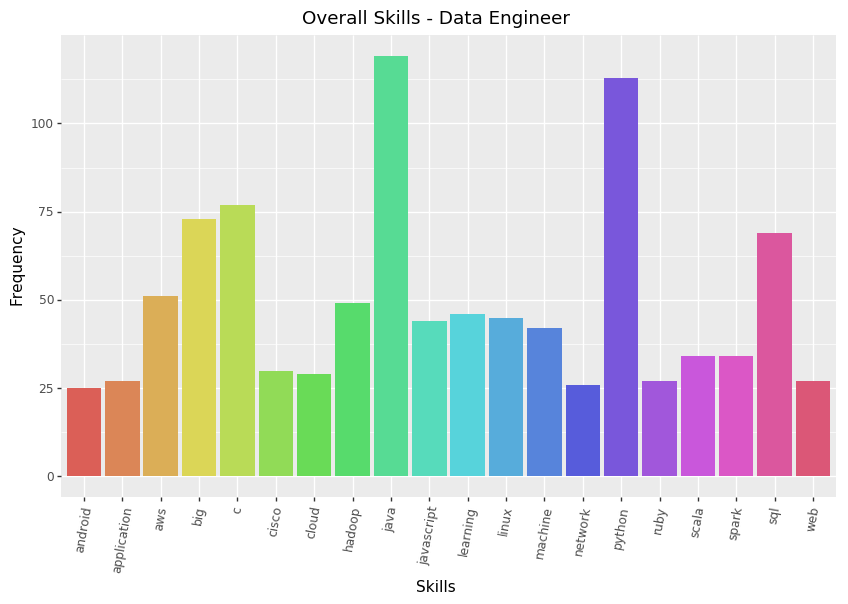

<ggplot: (-9223372029315595502)>

In [46]:
(ggplot(de_skills_frequency, aes(x = "Data Engineer", y = 'Frequency', fill='Data Engineer')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Overall Skills - Data Engineer", x = "Skills", y = "Frequency")
)

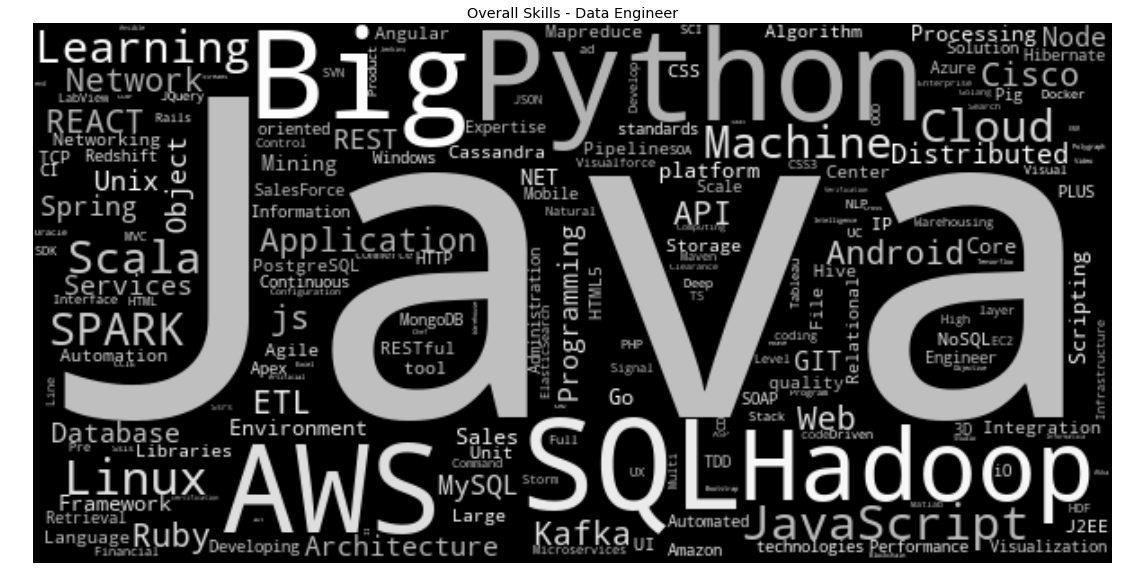

In [47]:
de_overall_skills = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 600, height = 300)
de_overall_skills.generate(de_skills)
plt.figure(figsize = (15,7.5))
plt.imshow(de_overall_skills.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Overall Skills - Data Engineer")
plt.show()

### Top Skills - Data Analyst

In [48]:
da_skills=' '.join([str(i) for i in data_analyst_df['Skills']])
da_skills_frequency = countsort(da_skills)
da_skills_frequency = da_skills_frequency.sort_values(by = 'count', ascending = False).reset_index(drop = True)
da_skills_frequency = da_skills_frequency.rename(columns = {'word' : 'Data Analyst', 'count' : 'Frequency'})
da_skills_frequency

,Data Analyst,Frequency
0,sql,31
1,excel,18
2,tableau,10
3,financial,9
4,automation,8
5,python,7
6,analyst,7
7,e-commerce,5
8,marketing,5
9,create,5


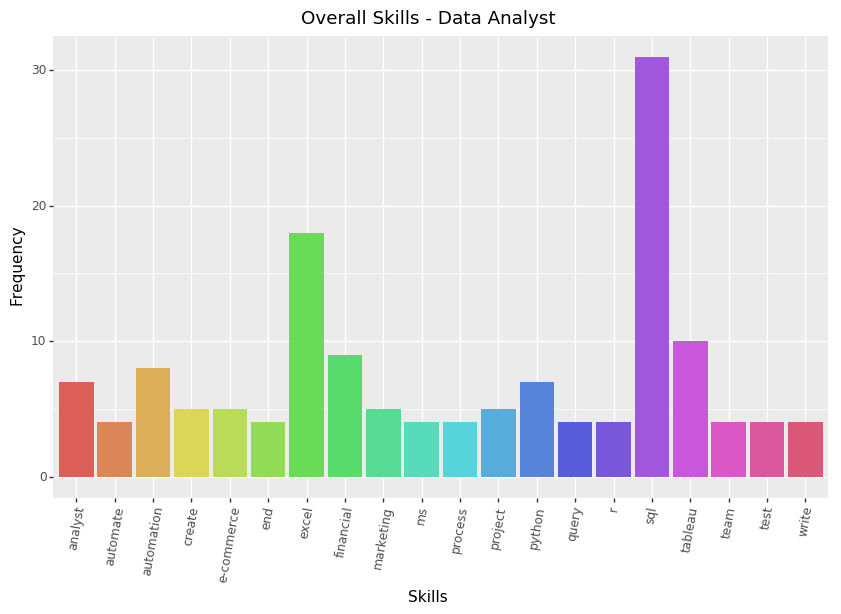

<ggplot: (-9223372029316734176)>

In [49]:
(ggplot(da_skills_frequency, aes(x = "Data Analyst", y = 'Frequency', fill='Data Analyst')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Overall Skills - Data Analyst", x = "Skills", y = "Frequency")
)

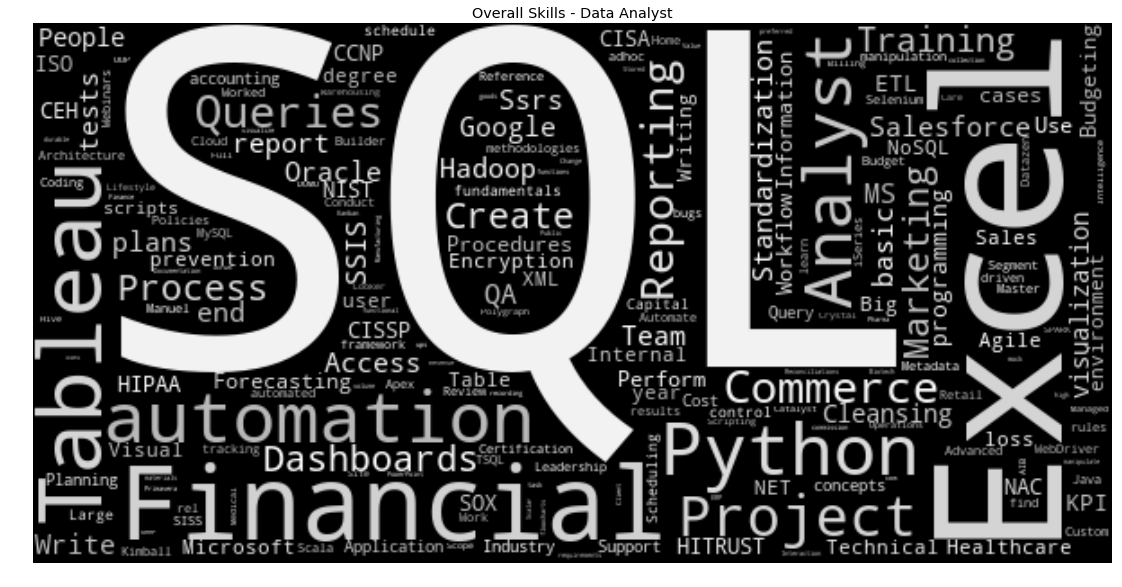

In [50]:
da_overall_skills = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 600, height = 300)
da_overall_skills.generate(da_skills)
plt.figure(figsize = (15,7.5))
plt.imshow(da_overall_skills.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Overall Skills - Data Analyst")
plt.show()

### Top Skills - Business Intelligence

In [ ]:
bi_skills=' '.join([str(i) for i in BI_df['Skills']])
bi_skills_frequency = countsort(bi_skills)
bi_skills_frequency = bi_skills_frequency.sort_values(by = 'count', ascending = False).reset_index(drop = True)
bi_skills_frequency = bi_skills_frequency.rename(columns = {'word' : 'Business Intelligence', 'count' : 'Frequency'})
bi_skills_frequency

,Business Intelligence,Frequency
0,intelligence,27
1,sql,18
2,bi,14
3,oracle,12
4,etl,10
5,java,9
6,product,8
7,sales,8
8,enterprise,7
9,one,7


In [ ]:
(ggplot(bi_skills_frequency, aes(x = "Business Intelligence", y = 'Frequency', fill='Business Intelligence')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Overall Skills - Business Intelligence", x = "Skills", y = "Frequency")
)

In [ ]:
bi_overall_skills = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 600, height = 300)
bi_overall_skills.generate(bi_skills)
plt.figure(figsize = (15,7.5))
plt.imshow(bi_overall_skills.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Overall Skills - Business Intelligence")
plt.show()

# 3.) Analysis - Descriptions

In [ ]:
description_df = master_data.copy()

In [ ]:
#generate wordlist and lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
#preprocessing function
def my_preprocessing(s):
    s = s.lower() # downcase
    s = re.sub(r"\W"," ",s)
    s = re.sub(r"\d"," ",s) 
    s = re.sub(r"\s+[a-z]\s+"," ",s)
    s = re.sub(r"^[a-zA-Z\s*]*what you will be doing",'',s)
    s = re.sub(r"\s+",' ',s)
    return s

In [ ]:
responsibilities=[]
benefits=[]
jddataset = description_df['Description']
for i in range(len(jddataset)):
    s = my_preprocessing(jddataset[i])
    if 'what in it for you' in s :
        responsibility = s.split('what in it for you')[0]
        benefit = s.split('what in it for you')[1]
    else:
        responsibility = s
        benefit = ''
    responsibilities.append(responsibility)
    benefits.append(benefit)

In [ ]:
def my_tokenize(s):
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in set(stop_words)]# remove stopwords
    s = ' '.join(tokens)
    return s

In [ ]:
#tokenize responsibilities
for i in range(len(responsibilities)):
    responsibilities[i] = my_tokenize(responsibilities[i])
    i = i+1

In [ ]:
text = pd.DataFrame(responsibilities,columns = ['re'])
text['re']

In [ ]:
text_list = [i.split() for i in text['re']]
len(text_list)

In [ ]:
stop_list = ['experience', 'data']
for i in range(len(text_list)):
    for word in list(text_list[i]):  # iterating on a copy since removing will mess things up
        if word in stop_list:
            text_list[i].remove(word)

In [ ]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(text_list)
dictionary.save('dictionary.dict')
print (dictionary)

In [ ]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)

print (len(doc_term_matrix))
print (doc_term_matrix[100])

In [ ]:
from time import time
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO,
                   filename='running.log',filemode='w')

In [ ]:
start = time()
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)
print ('used: {:.2f}s'.format(time()-start))

In [ ]:
for i in ldamodel.print_topics(): 
    for j in i: print (j)

In [ ]:
ldamodel.save('topic.model')

In [ ]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

In [ ]:
d = gensim.corpora.Dictionary.load('dictionary.dict')
c = gensim.corpora.MmCorpus('corpus.mm')
lda = gensim.models.LdaModel.load('topic.model')

In [ ]:
data = pyLDAvis.gensim.prepare(lda, c, d)
data

In [ ]:
pyLDAvis.save_html(data,'vis.html')

In [ ]:
%%time
import gensim
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
lda = gensim.models.LdaModel.load('topic.model')

In [ ]:
fiz=plt.figure(figsize=(15,30))
for i in range(10):
    df=pd.DataFrame(lda.show_topic(i), columns=['term','prob']).set_index('term')
    plt.subplot(5,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    

plt.show()

### Description Word Frequency

In [ ]:
word2count = {}
for data in responsibilities:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [ ]:
#sort words 
from collections import OrderedDict
sorted_word = OrderedDict(sorted(word2count.items(), key=lambda kv: kv[1], reverse=True))
sorted_word

In [ ]:
#choose most frequent ones
freq_words = heapq.nlargest(1000,word2count,key = word2count.get)
freq_words

In [ ]:
word_frequencies =' '.join([str(i) for i in freq_words])

In [ ]:
frequent_words = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 600, height = 300)
frequent_words.generate(word_frequencies)
plt.figure(figsize = (15,7.5))
plt.imshow(frequent_words.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Description - Frequent Words")
plt.show()

## Salary Analysis

### What are you expected to earn in each state?

In [ ]:
min_state_df = master_data[master_data['Min_Salary'] != 'Unknown'].reset_index(drop = True)
max_state_df = master_data[master_data['Max_Salary'] != 'Unknown'].reset_index(drop = True)

In [ ]:
min_state_set = np.unique(min_state_df['States'])
max_state_set = np.unique(max_state_df['States'])

min_state_dict = dict(tuple(min_state_df.groupby('States')))
max_state_dict = dict(tuple(max_state_df.groupby('States')))

In [ ]:
min_state_salaries = {}
max_state_salaries = {}
for state in min_state_set:
    avg_min_salary = int(min_state_dict[state]['Min_Salary'].mean())
    min_state_salaries.update({state : avg_min_salary})

for state in max_state_set:
    avg_max_salary = int(max_state_dict[state]['Max_Salary'].mean())
    max_state_salaries.update({state : avg_max_salary})
    
min_state_salaries = OrderedDict(sorted(min_state_salaries.items(), key=lambda t: t[1]))
max_state_salaries = OrderedDict(sorted(max_state_salaries.items(), key=lambda t: t[1]))

### What is the minimum expected salary to earn in each state?

In [ ]:
min_state_salaries

In [ ]:
plt.rcParams['figure.figsize'] = (20,10)
min_state_names = list(min_state_salaries.keys())
min_state_values = sorted(list(min_state_salaries.values()))
min_state_y_pos = np.arange(len(min_state_names))

plt.barh(min_state_y_pos, min_state_values, align = 'center',alpha = 0.5)
plt.yticks(min_state_y_pos, min_state_names)
plt.xlabel('Expected Salary')
plt.title('Expected Minimum Earnings Per State')
plt.show()

In [ ]:
cmin_state_salaries = pd.DataFrame({'States' : min_state_names, 'Min Earnings' : min_state_values})
cmin_state_salaries = cmin_state_salaries.sort_values(by = 'Min Earnings', ascending = False).reset_index(drop = True)
cmin_state_salaries = cmin_state_salaries[['States','Min Earnings']]
cmin_state_salaries[:10]


### What is the maximum expected salary to each in each state?

In [ ]:
max_state_salaries

In [ ]:
plt.rcParams['figure.figsize'] = (20,10)
max_state_names = list(max_state_salaries.keys())
max_state_values = sorted(list(max_state_salaries.values()))
max_state_y_pos = np.arange(len(max_state_names))

plt.barh(max_state_y_pos, max_state_values, align = 'center',alpha = 0.5)
plt.yticks(max_state_y_pos, max_state_names)
plt.xlabel('Expected Salary')
plt.title('Expected Maximum Earnings Per State')
plt.show()

In [ ]:
cmax_state_salaries = pd.DataFrame({'States' : max_state_names, 'Max Earnings' : max_state_values})
cmax_state_salaries = cmax_state_salaries.sort_values(by = 'Max Earnings', ascending = False).reset_index(drop = True)
cmax_state_salaries = cmax_state_salaries[['States','Max Earnings']]
cmax_state_salaries[:10]

### What are the expected earnings for the top 10 highest minimum and maximum location salaries?

In [ ]:
min_location_df = master_data[master_data['Min_Salary'] != 'Unknown'].reset_index(drop = True)
max_location_df = master_data[master_data['Max_Salary'] != 'Unknown'].reset_index(drop = True)

In [ ]:
min_location_set = np.unique(min_location_df['Location'])
max_location_set = np.unique(max_location_df['Location'])

min_location_dict = dict(tuple(min_location_df.groupby('Location')))
max_location_dict = dict(tuple(max_location_df.groupby('Location')))

In [ ]:
min_location_salaries = {}
max_location_salaries = {}
for state in min_location_set:
    LOCavg_min_salary = int(min_location_dict[state]['Min_Salary'].mean())
    min_location_salaries.update({state : LOCavg_min_salary})

for state in max_location_set:
    LOCavg_max_salary = int(max_location_dict[state]['Max_Salary'].mean())
    max_location_salaries.update({state : LOCavg_max_salary})
    
min_location_salaries = OrderedDict(sorted(min_location_salaries.items(), key=lambda t: t[1]))
max_location_salaries = OrderedDict(sorted(max_location_salaries.items(), key=lambda t: t[1]))

from collections import Counter
min_location_salaries = collections.Counter(min_location_salaries).most_common(10)
max_location_salaries = collections.Counter(max_location_salaries).most_common(10)

min_location_salaries = OrderedDict(sorted(dict(min_location_salaries).items(), key = lambda t:t[1]))
max_location_salaries = OrderedDict(sorted(dict(max_location_salaries).items(), key = lambda t:t[1]))

In [ ]:
min_location_salaries

In [ ]:
max_location_salaries

In [ ]:
plt.rcParams['figure.figsize'] = (15,7.5)
min_location_names = list(min_location_salaries.keys())
min_location_values = sorted(list(min_location_salaries.values()))
min_location_y_pos = np.arange(len(min_location_names))

plt.barh(min_location_y_pos, min_location_values, align = 'center',alpha = 0.5)
plt.yticks(min_location_y_pos, min_location_names)
plt.xlabel('Expected Salary')
plt.title('Top 10 Expected Minimum Earnings Per Location')
plt.show()

In [ ]:
cmin_location_salaries = pd.DataFrame({'Location' : min_location_names, 'Min Earnings' : min_location_values})
cmin_location_salaries = cmin_location_salaries.sort_values(by = 'Min Earnings', ascending = False).reset_index(drop = True)
cmin_location_salaries = cmin_location_salaries[['Location','Min Earnings']]
cmin_location_salaries

In [ ]:
plt.rcParams['figure.figsize'] = (15,7.5)
max_location_names = list(max_location_salaries.keys())
max_location_values = sorted(list(max_location_salaries.values()))
max_location_y_pos = np.arange(len(max_location_names))

plt.barh(max_location_y_pos, max_location_values, align = 'center',alpha = 0.5)
plt.yticks(max_location_y_pos, max_location_names)
plt.xlabel('Expected Salary')
plt.title('Top 10 Expected Maximum Earnings Per Location')
plt.show()

In [ ]:
cmax_location_salaries = pd.DataFrame({'Location' : max_location_names, 'Max Earnings' : max_location_values})
cmax_location_salaries = cmax_location_salaries.sort_values(by = 'Max Earnings', ascending = False).reset_index(drop = True)
cmax_location_salaries = cmax_location_salaries[['Location','Max Earnings']]
cmax_location_salaries

### What are the expected earnings minimum and maximum earnings for each job type (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence)?

In [ ]:
min_job_df = master_data[master_data['Min_Salary'] != 'Unknown'].reset_index(drop = True)
max_job_df = master_data[master_data['Max_Salary'] != 'Unknown'].reset_index(drop = True)

In [ ]:
min_job_set = np.unique(min_job_df['Search'])
max_job_set = np.unique(max_job_df['Search'])

min_job_dict = dict(tuple(min_job_df.groupby('Search')))
max_job_dict = dict(tuple(max_job_df.groupby('Search')))

In [ ]:
min_job_salaries = {}
max_job_salaries = {}
for job in min_job_set:
    avg_MINjob_salary = int(min_job_dict[job]['Min_Salary'].mean())
    min_job_salaries.update({job : avg_MINjob_salary})

for job in max_job_set:
    avg_MAXjob_salary = int(max_job_dict[job]['Max_Salary'].mean())
    max_job_salaries.update({job : avg_MAXjob_salary})
    
min_job_salaries = OrderedDict(sorted(min_job_salaries.items(), key=lambda t: t[1]))
max_job_salaries = OrderedDict(sorted(max_job_salaries.items(), key=lambda t: t[1]))

In [ ]:
min_job_salaries

In [ ]:
max_job_salaries

In [ ]:
plt.rcParams['figure.figsize'] = (20,10)
min_job_names = list(min_job_salaries.keys())
min_job_values = sorted(list(min_job_salaries.values()))
min_job_y_pos = np.arange(len(min_job_names))

plt.barh(min_job_y_pos, min_job_values, align = 'center',alpha = 0.5)
plt.yticks(min_job_y_pos, min_job_names)
plt.xlabel('Expected Salary')
plt.title('Expected Minimum Earnings Per Job Type')
plt.show()

In [ ]:
cmin_job_salaries = pd.DataFrame({'Job Type' : min_job_names, 'Min Earnings' : min_job_values})
cmin_job_salaries = cmin_job_salaries.sort_values(by = 'Min Earnings', ascending = False).reset_index(drop = True)
cmin_job_salaries = cmin_job_salaries[['Job Type','Min Earnings']]
cmin_job_salaries

In [ ]:
plt.rcParams['figure.figsize'] = (20,10)
max_job_names = list(max_job_salaries.keys())
max_job_values = sorted(list(max_job_salaries.values()))
max_job_y_pos = np.arange(len(max_job_names))

plt.barh(max_job_y_pos, max_job_values, align = 'center',alpha = 0.5)
plt.yticks(max_job_y_pos, max_job_names)
plt.xlabel('Expected Salary')
plt.title('Expected Maximum Earnings Per Job Type')
plt.show()

In [ ]:
cmax_job_salaries = pd.DataFrame({'Job Type' : max_job_names, 'Max Earnings' : max_job_values})
cmax_job_salaries = cmax_job_salaries.sort_values(by = 'Max Earnings', ascending = False).reset_index(drop = True)
cmax_job_salaries = cmax_job_salaries[['Job Type','Max Earnings']]
cmax_job_salaries

# exploratory analysis

In [ ]:
import pandas as pd
import numpy as np
import plotnine as gg
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import geopandas as gpd         
import osmnx as ox              
import shapely.geometry as geom 
df = pd.read_csv('jobs_data.csv')

In [ ]:
df.dtypes

In [ ]:
df.Mean_Salary = pd.to_numeric(df.Mean_Salary, errors='coerce')
df.Max_Salary = pd.to_numeric(df.Max_Salary, errors='coerce')
df.Min_Salary= pd.to_numeric(df.Min_Salary, errors='coerce')

In [ ]:
df1 = df.dropna(subset = ['Mean_Salary', 'Min_Salary', 'Max_Salary'])

# distribution of mean salary

In [ ]:
# histogram
plt.figure(figsize=(6,6))
sns.distplot(df1['Mean_Salary'].dropna(),color = 'blue')

## Is there a different distribution of location(State, City)/Job Title(data scientist/analyst/engineer/BI) of mean salary?

In [ ]:
#histogram of price based on different job titles
job_type = df1.Search.unique()

plt.subplots(figsize=(10,8))
for t in np.ndenumerate(job_type):
    kind = df1[df1['Search'] == t[1]]
    sns.distplot(kind.Mean_Salary.dropna(), label=t[1], norm_hist = True)
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.legend(loc=2)
plt.title('Histogram of Mean Salary for Different Job Title')
plt.xlabel('Mean Salary')
plt.show()

In [ ]:
#histogram of price based on different states
job_type = df1.States.unique()

plt.subplots(figsize=(15,15))
for t in np.ndenumerate(job_type):
    kind = df1[df1['States'] == t[1]]
    sns.distplot(kind.Mean_Salary.dropna(), label=t[1], norm_hist = True)
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.legend(loc=2)
plt.title('Histogram of Mean Salary for Different Job Title')
plt.xlabel('Mean Salary')
plt.show()

In [ ]:
df1.groupby(['States','Search']).agg({'Mean_Salary': 'mean'}).head()

In [ ]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Pair plot to explore variables
with sns.plotting_context("notebook",font_scale=1.5):
    g = sns.pairplot(df1, vars = ['Mean_Salary','Min_Salary','Max_Salary','Longitude','Latitude'], hue='Search',
                    palette= sns.hls_palette(4),size=2)
g.set(xticklabels=[]);


In [ ]:
# seaborn correlation matrix
str_list = []
for colname, colvalue in df1.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
            
# Only compare numerical features          
diff_list = df1.columns.difference(str_list) 
df2 = df1[diff_list]
f, ax = plt.subplots(figsize=(12, 8))
plt.title('Pearson Correlation Matrix')

sns.heatmap(df2.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="GnBu", linecolor='k', annot=True)
plt.show()

# Linear regression model of salary

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error 
from sklearn import preprocessing

In [ ]:
df2 = df1[['Mean_Salary','Latitude','Longitude']]
df2.dtypes

In [ ]:
from sklearn.cross_validation import train_test_split
train_data, test_data = train_test_split(df2, train_size = 0.8, random_state = 10)

__Simple Linear Regression (One Variable)__

In [ ]:
def simple_linear(train, test, feature):
    """simple linear regression function specified for the use of our dataset 
    Args:
        train(dataframe): training dataset
        test(dataframe): testing dataset
        feature(Series): features in a dataset
    Returns:
        RMSE(float): Root Mean Squared Error
        regr.intercept (float): regression interception
        regr.coefficient (float): regression coefficient
    """
    regr = linear_model.LinearRegression()
    #Train the model
    regr.fit(train.as_matrix(columns = [feature]), train.as_matrix(columns = ['Mean_Salary']))
    # Calculate the RMSE on test data
    RMSE = mean_squared_error(test.as_matrix(columns = ['Mean_Salary']), 
                              regr.predict(test.as_matrix(columns = [feature])))**0.5 
    return RMSE, regr.intercept_[0], regr.coef_[0][0]

#create an input list, remove the variables we are predicting and non-numerical data
input_list = train_data.columns.values.tolist()
input_list.remove('Mean_Salary') 

simple_linear_result = pd.DataFrame(columns = ['feature', 'RMSE', 'intercept', 'coefficient'])

# Calculate the RMSE of the test data for each feature
for p in input_list:
    RMSE, w1, w0 = simple_linear(train_data, test_data, p)
    simple_linear_result = simple_linear_result.append({'feature':p, 'RMSE':RMSE, 'intercept':w0, 'coefficient': w1}
                                                        ,ignore_index=True)
simple_linear_result

In [ ]:
#plot scatterplot 
plt.figure(figsize=(8, 5))
ax = sns.regplot(x = df2.Latitude, y = df2.Mean_Salary)
plt.title('Latitude vs.Mean_Salary')
plt.xlabel('Latitude')
plt.ylabel('Mean Salary')

plt.tight_layout()

In [ ]:
#plot scatterplot 
plt.figure(figsize=(8, 5))
ax = sns.regplot(x = df2.Longitude, y = df2.Mean_Salary)
plt.title('Longitude vs.Mean_Salary')
plt.xlabel('Longitude')
plt.ylabel('Mean Salary')

plt.tight_layout()

__Multi Linear Regression (Two Variables)__

In [ ]:
# further split the train_data to include a validation set
#train_data2 = 60%, validation_data = 20%, test_data = 20%
train_data_2, validation_data = train_test_split(train_data, train_size = 0.75, random_state = 50)

In [ ]:
def RMSE(train, validation, features, new_input):
    """RMSE specified for the return RMSE of features
    Args:
        train(dataframe): training dataset
        validation(dataframe): validation dataset
        feature(Series): features in a dataset
        new_input (feature): reminding feature in the dataset
    Returns:
        RMSE(float): Root Mean Squared Error of train data
        RMSE(float): Root Mean Squared Error of validation data
    """
    features_list = list(features)
    features_list.append(new_input)
    regr = linear_model.LinearRegression() 
    regr.fit(train.as_matrix(columns = features_list), train.as_matrix(columns = ['Mean_Salary'])) # Train the model
    RMSE_train = mean_squared_error(train.as_matrix(columns = ['Mean_Salary']), 
                              regr.predict(train.as_matrix(columns = features_list)))**0.5 # Calculate the RMSE on train data
    RMSE_validation = mean_squared_error(validation.as_matrix(columns = ['Mean_Salary']), 
                              regr.predict(validation.as_matrix(columns = features_list)))**0.5 # Calculate the RMSE on train data
    return RMSE_train, RMSE_validation 

In [ ]:
input_list = train_data_2.columns.values.tolist()
input_list.remove('Mean_Salary')

greedy_algorithm = pd.DataFrame(columns = ['feature', 'train_error', 'validation_error'])  
i = 0
temp_list = []


# Go through all the features in the dataframe
while len(input_list)>0:
    
    # temporarily store the best feature at each iteration
    temp = pd.DataFrame(columns = ['feature', 'train_error', 'validation_error'])
    
    # to test all the remaining features
    for p in input_list:
        RMSE_train, RMSE_validation = RMSE(train_data_2, validation_data, temp_list, p)
        temp = temp.append({'feature':p, 'train_error':RMSE_train, 'validation_error':RMSE_validation}, ignore_index=True)
    
    # select the best feature with smallest train error
    temp = temp.sort_values('train_error')
    best = temp.iloc[0,0]
    temp_list.append(best)
    greedy_algorithm = greedy_algorithm.append({'feature': best, 
                                                  'train_error': temp.iloc[0,1], 'validation_error': temp.iloc[0,2]}, 
                                                 ignore_index=True)
    #remove the best feature before next iteration
    input_list.remove(best)
    i += 1
greedy_algorithm

In [ ]:
def multiple_regression_model(train, test, input_features):
    """modifided version of simple linear regression function to take mutliple features
    Args:
        train(dataframe): training dataset
        test(dataframe): testing dataset
        input_feature(Series): features in a dataset
    Returns:
        RMSE(float): Root Mean Squared Error
        regr.intercept (float): regression interception
        regr.coefficient (float): regression coefficient
    """
    regr = linear_model.LinearRegression() # Create a linear regression object
    regr.fit(train.as_matrix(columns = input_features), train.as_matrix(columns = ['Mean_Salary'])) # Train the model
    RMSE = mean_squared_error(test.as_matrix(columns = ['Mean_Salary']), 
                              regr.predict(test.as_matrix(columns = input_features)))**0.5 # Calculate the RMSE on test data
    return RMSE, regr.intercept_[0], regr.coef_ 

In [ ]:
greedy_algo_features_list = greedy_algorithm['feature'].tolist()[:4]
test_error, _, _ = multiple_regression_model(train_data_2, test_data, greedy_algo_features_list)
print ('test error (RMSE) is: %s' %test_error)

Mean_Salary = -14648.4802 + Longitude x -575.3558 + Latitude x 2448.8531

In [ ]:
multiple_regression_model(train_data_2, test_data, greedy_algo_features_list)